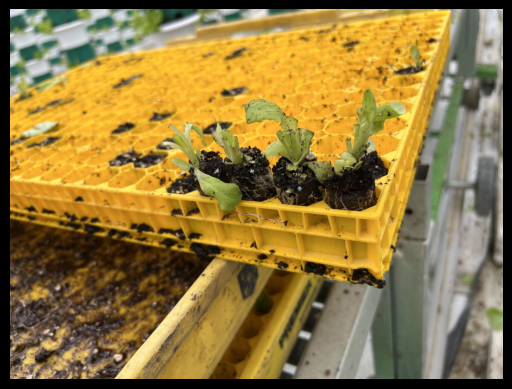

In [3]:
import matplotlib.pyplot as plt

image = plt.imread('images/cf5a5677-IMG_4708.jpg')

plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
import json
import numpy as np
with open('images/label_studio_data.json', 'r') as f:
    label_studio_data = json.load(f)
example_rle_data = label_studio_data[0]['annotations'][0]['result'][0]['value']['rle']

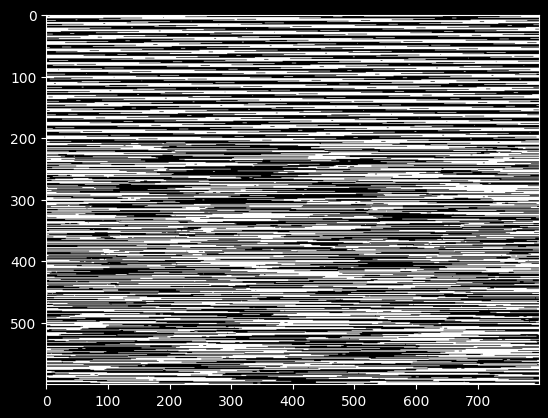

In [8]:
def decode_rle(rle, width, height):
    image = np.zeros(width * height, dtype=np.uint8)
    pointer = 0
    for i in range(0, len(rle), 2):
        pointer += rle[i]
        image[pointer:pointer + rle[i+1]] = 255
        pointer += rle[i+1]
    return image.reshape((height, width))

# Example usage:
rle_data = example_rle_data
width = 800  # example width of the image
height = 600  # example height of the image
mask = decode_rle(rle_data, width, height)

# To visualize the mask:
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.show()